## KNN REGRESSOR

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df=pd.read_csv('bmi.csv')
df

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,Overweight
737,44,1.91,106.90,29.302925,Overweight
738,25,1.82,88.40,26.687598,Overweight
739,35,1.88,98.50,27.868945,Overweight


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [136]:
df.duplicated().sum()

0

In [137]:
df.BmiClass.value_counts()  

BmiClass
Normal Weight    342
Overweight       166
Underweight       96
Obese Class 3     62
Obese Class 2     55
Obese Class 1     20
Name: count, dtype: int64

In [138]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.BmiClass=le.fit_transform(df.BmiClass)
df.dtypes

Age           int64
Height      float64
Weight      float64
Bmi         float64
BmiClass      int32
dtype: object

In [139]:
df

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,1
1,60,1.71,79.02,27.023700,4
2,60,1.55,74.70,31.092612,1
3,60,1.46,35.90,16.841809,5
4,60,1.58,97.10,38.896010,2
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,4
737,44,1.91,106.90,29.302925,4
738,25,1.82,88.40,26.687598,4
739,35,1.88,98.50,27.868945,4


<Axes: >

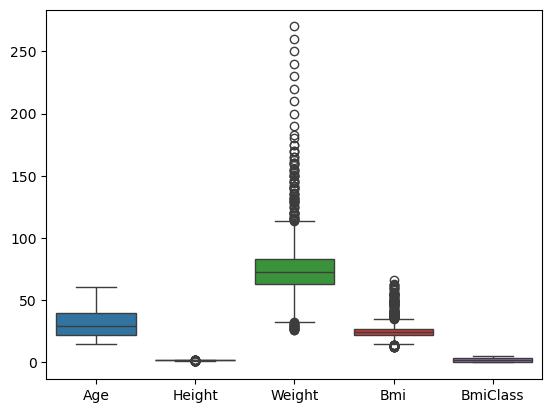

In [140]:
sns.boxplot(df)

In [141]:
df.skew()

Age         0.578546
Height     -0.390655
Weight      2.005903
Bmi         1.717363
BmiClass    0.250371
dtype: float64

In [142]:
for i in df.columns:
    q1=np.percentile(df[i],25,method='midpoint')
    q3=np.percentile(df[i],75,method='midpoint')
    iqr=q3-q1
    upper_lim=q3+0.5*iqr
    lower_lim=q1-0.5*iqr
    df[i]=df[i].clip(upper=upper_lim,lower=lower_lim)

<Axes: >

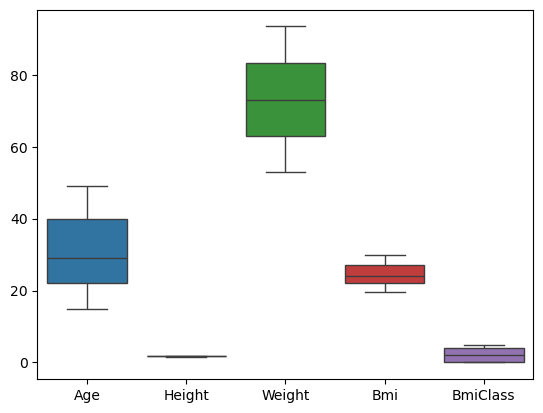

In [143]:
sns.boxplot(df)


In [144]:
y=df.BmiClass.values.reshape(-1,1)
x=df.drop('BmiClass',axis=1)

In [145]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc

array([[ 1.66960607,  1.43819152,  1.49595338,  1.49865493],
       [ 1.66960607, -0.08182835,  0.43107575,  0.71168681],
       [ 1.66960607, -1.58319767,  0.11227662,  1.49865493],
       ...,
       [-0.57216625,  1.43819152,  1.12328311,  0.61672663],
       [ 0.36190555,  1.43819152,  1.49595338,  0.95049765],
       [ 1.29597735,  1.43819152,  1.49595338,  1.41249838]])

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.1,random_state=42)

In [187]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn_model=knn.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)
knn_pred

array([[4. ],
       [4. ],
       [2.8],
       [3. ],
       [0. ],
       [2.4],
       [4. ],
       [2. ],
       [2.2],
       [0. ],
       [0. ],
       [4. ],
       [3.2],
       [5. ],
       [1.6],
       [0. ],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [0. ],
       [2.4],
       [3. ],
       [0. ],
       [0. ],
       [0. ],
       [4. ],
       [0. ],
       [0. ],
       [3. ],
       [5. ],
       [4. ],
       [0. ],
       [4. ],
       [2.8],
       [2.8],
       [1. ],
       [4. ],
       [5. ],
       [5. ],
       [0. ],
       [0. ],
       [4. ],
       [0. ],
       [2.8],
       [0. ],
       [2. ],
       [4. ],
       [2. ],
       [4. ],
       [4. ],
       [2.6],
       [5. ],
       [2.6],
       [0. ],
       [4. ],
       [0. ],
       [0. ],
       [4. ],
       [2.6],
       [5. ],
       [2.8],
       [0. ],
       [2.6],
       [0. ],
       [0. ],
       [0. ],
       [2.4],
       [0. ],
       [5. ],
       [0. ],
      

In [189]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [191]:
print(mean_squared_error(y_test,knn_pred))

0.8149333333333334


In [193]:
print(mean_absolute_error(y_test,knn_pred))

0.4


In [195]:
print(r2_score(y_test,knn_pred))

0.7941995151297476


## SVM REGRESSOR

In [197]:
from sklearn.svm import SVR
svm=SVR()
svm_model=svm.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
svm_pred

C:\Users\thasl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 4.12215116,  3.11599993,  2.4909093 ,  4.65037632, -0.23302495,
        3.0138434 ,  4.33754932,  2.4922547 ,  2.53522476,  0.41674522,
        0.10447688,  2.48596155,  2.83692779,  5.02223193,  2.1839514 ,
        0.81380531,  4.02004463,  3.72662546,  3.32084039,  4.10255533,
        0.19648448,  2.93218389,  3.05524305,  0.90177806,  0.18606995,
       -0.15407315,  3.40446673,  0.32269127, -0.08960809,  2.30787409,
        4.90439759,  3.46777191,  0.27946514,  4.0012003 ,  2.75928845,
        3.83885745,  1.21388114,  2.59190053,  5.02223193,  4.89979804,
        0.45291837,  0.86181055,  3.93676001,  0.29612725,  3.05380414,
        0.18686896,  2.02910241,  4.24602261,  1.56972336,  4.01598896,
        3.37549651,  2.98623972,  4.96564699,  2.7918571 , -0.11629807,
        3.91193149,  1.0158026 , -0.20536533,  2.38373991,  2.96207681,
        4.89972621,  2.93682222, -0.07274131,  2.61322226,  0.74254842,
        0.19934005,  0.06056915,  1.16750105, -0.00565525,  5.05

In [199]:
print(mean_squared_error(y_test,svm_pred))


1.0434623242137009


In [201]:
print(mean_absolute_error(y_test,svm_pred))


0.6606796113856774


In [203]:
print(r2_score(y_test,svm_pred))

0.7364875831147495
